### Image Processing for detecting Cracks in Concrete

### Import Used Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

### Get Positive & Negative Directories

In [2]:
positive_dir = Path(r'./DataSets/Positive')
negative_dir = Path(r'./DataSets/Negative')

### Creating DataFrames

In [3]:
import os.path

In [44]:
list(positive_dir.glob(r'*.jpg'))

[WindowsPath('DataSets/Positive/00001.jpg'),
 WindowsPath('DataSets/Positive/00002.jpg'),
 WindowsPath('DataSets/Positive/00003.jpg'),
 WindowsPath('DataSets/Positive/00004.jpg'),
 WindowsPath('DataSets/Positive/00005.jpg'),
 WindowsPath('DataSets/Positive/00006.jpg'),
 WindowsPath('DataSets/Positive/00007.jpg'),
 WindowsPath('DataSets/Positive/00008.jpg'),
 WindowsPath('DataSets/Positive/00009.jpg'),
 WindowsPath('DataSets/Positive/00010.jpg'),
 WindowsPath('DataSets/Positive/00011.jpg'),
 WindowsPath('DataSets/Positive/00012.jpg'),
 WindowsPath('DataSets/Positive/00013.jpg'),
 WindowsPath('DataSets/Positive/00014.jpg'),
 WindowsPath('DataSets/Positive/00015.jpg'),
 WindowsPath('DataSets/Positive/00016.jpg'),
 WindowsPath('DataSets/Positive/00017.jpg'),
 WindowsPath('DataSets/Positive/00018.jpg'),
 WindowsPath('DataSets/Positive/00019.jpg'),
 WindowsPath('DataSets/Positive/00020.jpg'),
 WindowsPath('DataSets/Positive/00021.jpg'),
 WindowsPath('DataSets/Positive/00022.jpg'),
 WindowsPa

In [4]:
list(map(lambda x: os.path.split(x)[1],list(positive_dir.glob(r'*.jpg'))))

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

In [5]:
def generate_df(img_dir, label):
    
    file_paths = pd.Series(list(img_dir.glob(r' ')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=file_paths.index)
    df =pd.concat([file_paths, labels], axis=1)
    
    return df

In [6]:
positive_df = generate_df(positive_dir, 'POSITIVE')
negative_df = generate_df(negative_dir, 'NEGATIVE')

# concatenate both positive df and negative df
all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,DataSets\Positive\03842.jpg,POSITIVE
1,DataSets\Positive\12899_1.jpg,POSITIVE
2,DataSets\Positive\15033_1.jpg,POSITIVE
3,DataSets\Negative\16782.jpg,NEGATIVE
4,DataSets\Positive\09202.jpg,POSITIVE
...,...,...
39995,DataSets\Positive\07814.jpg,POSITIVE
39996,DataSets\Negative\12512.jpg,NEGATIVE
39997,DataSets\Positive\05193.jpg,POSITIVE
39998,DataSets\Positive\12173_1.jpg,POSITIVE


### Split the DataSet

In [7]:
train_df, test_df = train_test_split(all_df.sample(6000, random_state=1), 
                train_size=0.7,
                shuffle=True,
                random_state=1)

In [8]:
train_df


,Filepath,Label
30189,DataSets\Negative\05491.jpg,NEGATIVE
8931,DataSets\Negative\11669.jpg,NEGATIVE
29084,DataSets\Positive\15616_1.jpg,POSITIVE
29189,DataSets\Negative\02517.jpg,NEGATIVE
2645,DataSets\Negative\17792.jpg,NEGATIVE
...,...,...
2090,DataSets\Positive\12368_1.jpg,POSITIVE
35101,DataSets\Positive\07028.jpg,POSITIVE
8720,DataSets\Positive\16562_1.jpg,POSITIVE
9955,DataSets\Positive\15478_1.jpg,POSITIVE


In [9]:
test_df

,Filepath,Label
15731,DataSets\Negative\04014.jpg,NEGATIVE
34272,DataSets\Negative\08408.jpg,NEGATIVE
39532,DataSets\Positive\13672_1.jpg,POSITIVE
10818,DataSets\Positive\19695.jpg,POSITIVE
35421,DataSets\Negative\02324.jpg,NEGATIVE
...,...,...
7174,DataSets\Positive\04272.jpg,POSITIVE
27207,DataSets\Negative\00468.jpg,NEGATIVE
28566,DataSets\Negative\04314.jpg,NEGATIVE
20688,DataSets\Positive\16522_1.jpg,POSITIVE


### Loading Image Data

In [10]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           validation_split=0.2)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [12]:
train_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='training')


val_data = train_gen.flow_from_dataframe(train_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42,
                                          subset='validation')


test_data = test_gen.flow_from_dataframe(test_df, 
                                          x_col='Filepath',
                                          y_col='Label',
                                          target_size=(120,120), 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=False,
                                          seed=42)

Found 3360 validated image filenames belonging to 2 classes.
Found 840 validated image filenames belonging to 2 classes.
Found 1800 validated image filenames belonging to 2 classes.


In [48]:
(test_data)

### Training DataSet

In [19]:
train_data.next()[0]

array([[[[0.7058824 , 0.69411767, 0.6666667 ],
         [0.69803923, 0.6862745 , 0.65882355],
         [0.67058825, 0.65882355, 0.6313726 ],
         ...,
         [0.627451  , 0.6156863 , 0.5882353 ],
         [0.61960787, 0.6       , 0.5764706 ],
         [0.6431373 , 0.62352943, 0.6       ]],

        [[0.65882355, 0.64705884, 0.61960787],
         [0.6862745 , 0.6745098 , 0.64705884],
         [0.6901961 , 0.6784314 , 0.6509804 ],
         ...,
         [0.6745098 , 0.6627451 , 0.63529414],
         [0.6666667 , 0.64705884, 0.62352943],
         [0.67058825, 0.6509804 , 0.627451  ]],

        [[0.64705884, 0.63529414, 0.60784316],
         [0.6901961 , 0.6784314 , 0.6509804 ],
         [0.73333335, 0.72156864, 0.69411767],
         ...,
         [0.65882355, 0.64705884, 0.61960787],
         [0.6784314 , 0.65882355, 0.63529414],
         [0.6627451 , 0.6431373 , 0.61960787]],

        ...,

        [[0.7568628 , 0.74509805, 0.7176471 ],
         [0.75294125, 0.7411765 , 0.7137255 ]

In [20]:
train_data.next()[1]


array([1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
      dtype=float32)

In [21]:
inputs = tf.keras.Input(shape=(120,120,3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


In [22]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [24]:
# print model summary
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d_1   (None, 32)               0     

In [25]:
history = model.fit(
    train_data, 
    validation_data=val_data, 
    epochs=100, 
    callbacks=[
        tf.ker as.callbacks.EarlyStopping(
            monitor='val_loss',                                                          
            patience=3,
            restore_best_weights=True)
                             ])

Epoch 1/100
105/105 [==============================] - 32s 301ms/step - loss: 0.6808 - accuracy: 0.5961 - val_loss: 0.6575 - val_accuracy: 0.6393
Epoch 2/100
105/105 [==============================] - 36s 344ms/step - loss: 0.6358 - accuracy: 0.6464 - val_loss: 0.6242 - val_accuracy: 0.6321
Epoch 3/100
105/105 [==============================] - 33s 314ms/step - loss: 0.5585 - accuracy: 0.7583 - val_loss: 0.5185 - val_accuracy: 0.8071
Epoch 4/100
105/105 [==============================] - 26s 251ms/step - loss: 0.4815 - accuracy: 0.8402 - val_loss: 0.4564 - val_accuracy: 0.8560
Epoch 5/100
105/105 [==============================] - 26s 250ms/step - loss: 0.4138 - accuracy: 0.8935 - val_loss: 0.3689 - val_accuracy: 0.9262
Epoch 6/100
105/105 [==============================] - 27s 254ms/step - loss: 0.3533 - accuracy: 0.9131 - val_loss: 0.2928 - val_accuracy: 0.9238
Epoch 7/100
105/105 [==============================] - 27s 260ms/step - loss: 0.2737 - accuracy: 0.9348 - val_loss: 0.2455 -

### Plotting

In [30]:
fig = px.line(history.history,
             y=['loss', 'val_loss'],
             labels={'index':'Epoch', 'value': 'loss'},
             title='Training and Validation Loss')

fig.show()

### Final Results

In [38]:
model.predict(test_data)

array([[0.16388497],
       [0.07719946],
       [0.8527734 ],
       ...,
       [0.05114871],
       [0.99989045],
       [0.9999922 ]], dtype=float32)

In [37]:
test_data.labels


[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [41]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    accuracy = results[1]
    
    print(f'Test Loss {loss:.5f}')
    print(f'Test Accuracy {accuracy * 100:.2f} %')
    
    
    # predicted y values
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    
    conf_matr = confusion_matrix(test_data.labels, y_pred)
    
    class_report = classification_report(test_data.labels, y_pred,
                                         target_names=['NEGATIVE', 'POSITIVE'])
    
    plt.figure(figsize=(6,6))
    
    sns.heatmap(conf_matr, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('Classification Report :\n......................\n', class_report)

Test Loss 0.11541
Test Accuracy 97.28 %


C:\Users\Admin\AppData\Local\Temp/ipykernel_11108/4109692346.py:12: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



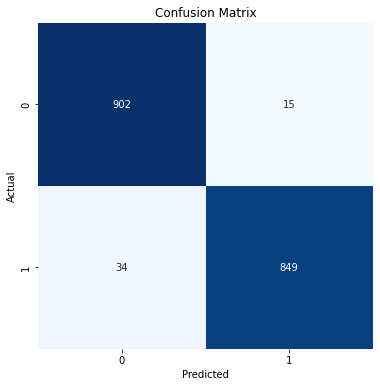

Classification Report :
......................
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.98      0.97       917
    POSITIVE       0.98      0.96      0.97       883

    accuracy                           0.97      1800
   macro avg       0.97      0.97      0.97      1800
weighted avg       0.97      0.97      0.97      1800



In [42]:
evaluate_model(model, test_data)